Ніконенко Назарій Андрійович | ФІТ 2-8 | ВАРІАНТ №16

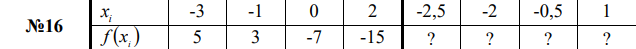

Інтерполяційний багаточлен Лагранжа

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand, Rational, simplify, lambdify

In [ ]:
x_nodes = np.array([-3.0, -1.0, 0.0, 2.0])
y_nodes = np.array([5.0, 3.0, -7.0, -15.0])
x_eval = np.array([-2.5, -2.0, -0.5, 1.0])

In [ ]:
x = symbols('x')
n = len(x_nodes)
L_sym = 0
for i in range(n):
    li = 1
    for j in range(n):
        if i == j: continue
        xi = Rational(x_nodes[i]); xj = Rational(x_nodes[j])
        li *= (x - xj) / (xi - xj)
    L_sym += Rational(y_nodes[i]) * simplify(li)
L_sym = expand(L_sym)

In [ ]:
poly_func = lambdify(x, L_sym, 'numpy')
eval_values = [float(poly_func(xp)) for xp in x_eval]

In [ ]:
print("L(x) =", L_sym)
for xi, v in zip(x_eval, eval_values):
    print(xi, round(v, 3))

L(x) = x**3 + x**2 - 10*x - 7
-2.5 8.625
-2.0 9.0
-0.5 -1.875
1.0 -15.0


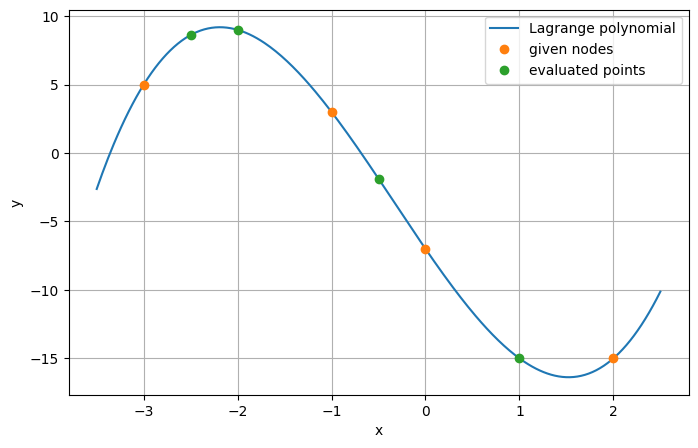

In [ ]:
x_plot = np.linspace(np.min(x_nodes)-0.5, np.max(x_nodes)+0.5, 300)
y_plot = poly_func(x_plot)
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, label='Lagrange polynomial')
plt.plot(x_nodes, y_nodes, 'o', label='given nodes')
plt.plot(x_eval, eval_values, 'o', label='evaluated points')
plt.grid(True); plt.legend(); plt.xlabel('x'); plt.ylabel('y')
plt.show()
